In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
def set_random_seed(seed: int = 42) -> None:
    torch.manual_seed(42)
    torch.cuda.manual_seed(42)
    random.seed(42)
    np.random.seed(42)

In [4]:
set_random_seed()

In [5]:
weight = 0.7
bias = 0.3

X = torch.linspace(0, 0.5, 50).unsqueeze(dim=1)
y = weight * X + bias

print(X[:5])
print(y[:5])

tensor([[0.0000],
        [0.0102],
        [0.0204],
        [0.0306],
        [0.0408]])
tensor([[0.3000],
        [0.3071],
        [0.3143],
        [0.3214],
        [0.3286]])


In [6]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [7]:
# Split the data into train and test
train_index = int(len(X) * 0.8)
test_index = int(len(X) - train_index)

X_train, y_train = X[:train_index], y[:train_index]
X_test, y_test = X[train_index:], y[train_index:]

In [8]:
X_train.shape, X_test.shape

(torch.Size([40, 1]), torch.Size([10, 1]))

In [9]:
def plot_predictions(
    train_data: torch.Tensor = X_train,
    train_label: torch.Tensor = y_train,
    test_data: torch.Tensor = X_test,
    test_label: torch.Tensor = y_test,
    predictions: torch.Tensor = None,
) -> None:
    plt.figure(figsize=(10, 7), dpi=150)

    plt.scatter(train_data, train_label, c="b", s=12, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=12, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=12, label="Prediction data")

    plt.legend()

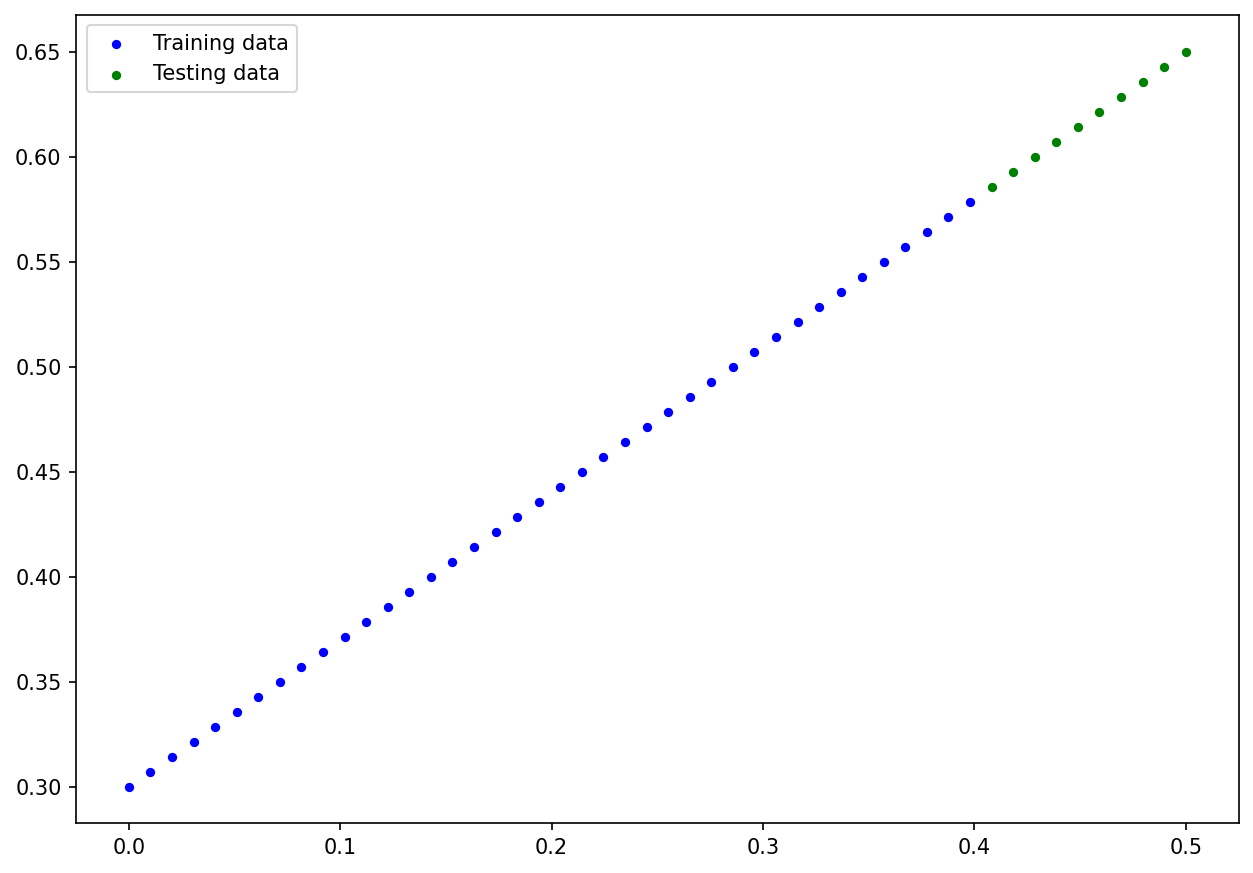

In [10]:
plot_predictions()

In [11]:
class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        )
        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [12]:
model = LinearRegression()

In [13]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
loss_fn = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [15]:
epochs = 1000

train_loss_values = []
test_loss_values = []
for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    # Computer error
    train_loss = loss_fn(y_pred, y_train)

    # Backpropagation
    train_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    model.eval()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 100 == 0:
            train_loss_values.append(train_loss.item())
            test_loss_values.append(test_loss.item())
            print(
                f"Epoch: {epoch} | MAE Train loss: {train_loss} | MAE Test loss: {test_loss}"
            )

Epoch: 0 | MAE Train loss: 0.2434817999601364 | MAE Test loss: 0.32525932788848877
Epoch: 100 | MAE Train loss: 0.024334557354450226 | MAE Test loss: 0.05952748656272888
Epoch: 200 | MAE Train loss: 0.014338219538331032 | MAE Test loss: 0.03504527360200882
Epoch: 300 | MAE Train loss: 0.004341776482760906 | MAE Test loss: 0.010562533512711525
Epoch: 400 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017
Epoch: 500 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017
Epoch: 600 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017
Epoch: 700 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017
Epoch: 800 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017
Epoch: 900 | MAE Train loss: 0.0042838058434426785 | MAE Test loss: 0.0020121275447309017


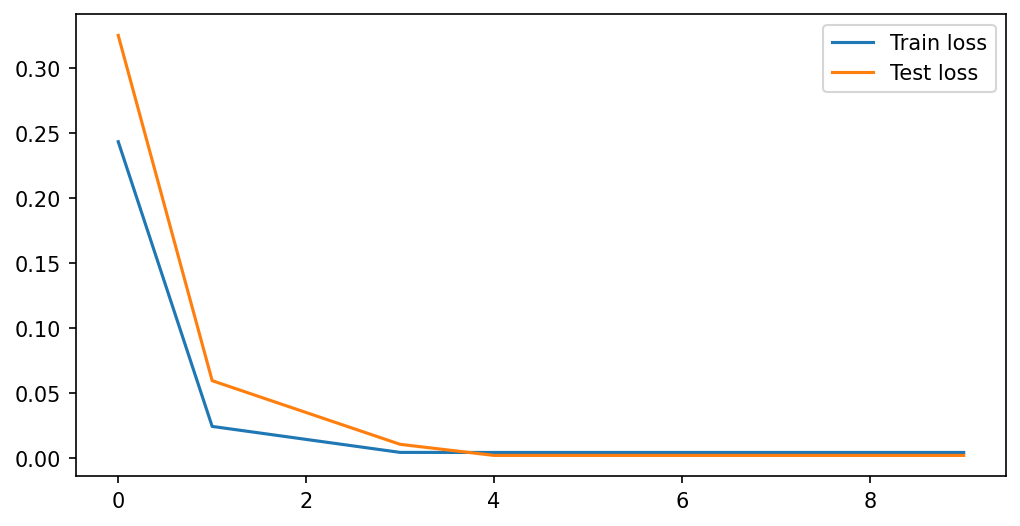

In [16]:
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(range(epochs // 100), train_loss_values, label="Train loss")
plt.plot(range(epochs // 100), test_loss_values, label="Test loss")
plt.legend()

In [17]:
print(f"Original values for weight and bias are:\nweights: {weight}, bias: {bias}")
print(f"Learned values for weight and bias are:\{model.state_dict()}")


Original values for weight and bias are:
weights: 0.7, bias: 0.3
Learned values for weight and bias are:\OrderedDict([('weights', tensor([0.6819])), ('bias', tensor([0.2993]))])


In [18]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)


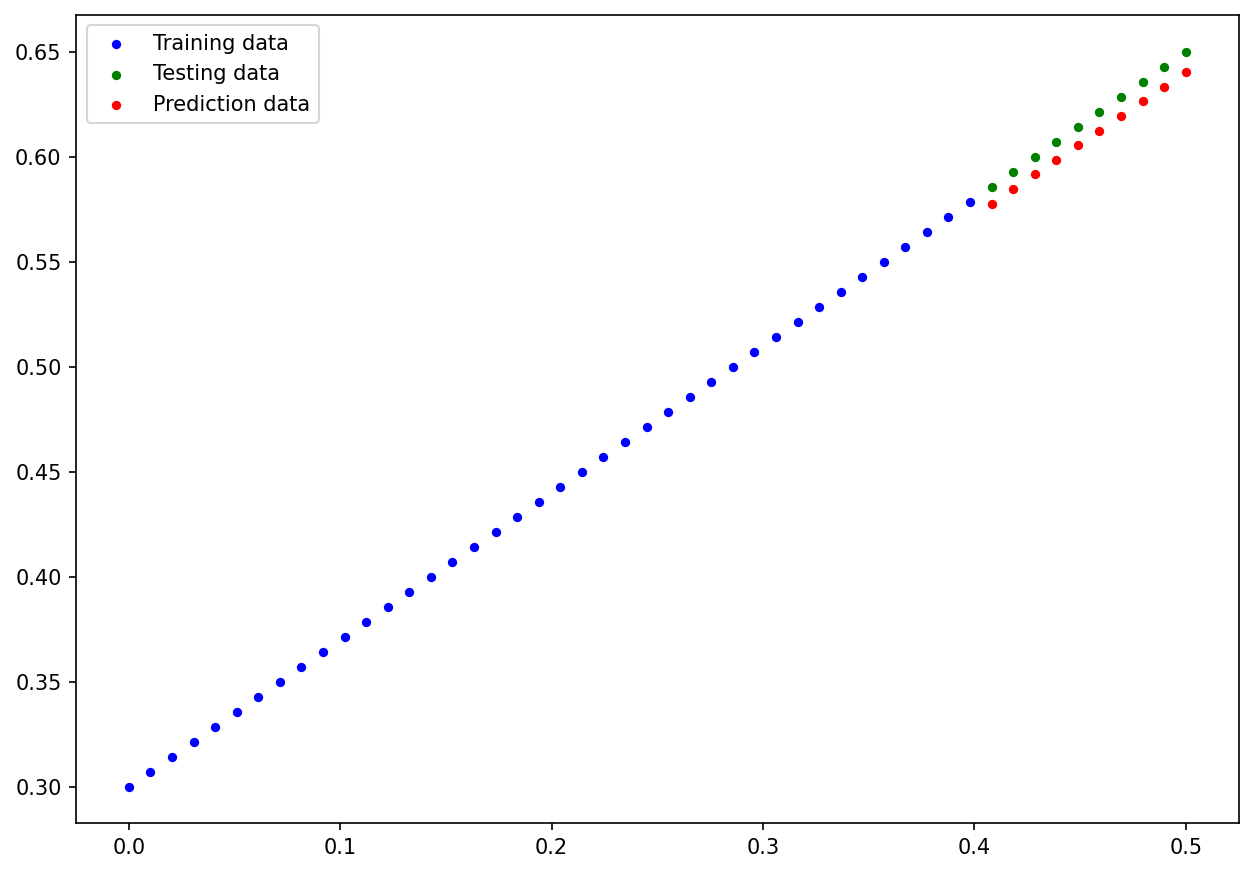

In [19]:
plot_predictions(predictions=y_pred)

## Exercise


In [20]:
weight = 0.3
bias = 0.9

X = torch.linspace(1, 100, 1000).unsqueeze(dim=1)
y = weight * X + bias

print(X[:5], y[:5])

tensor([[1.0000],
        [1.0991],
        [1.1982],
        [1.2973],
        [1.3964]]) tensor([[1.2000],
        [1.2297],
        [1.2595],
        [1.2892],
        [1.3189]])


In [21]:
X_train, y_train, X_test, y_test = X[:800], y[:800], X[800:], y[800:]

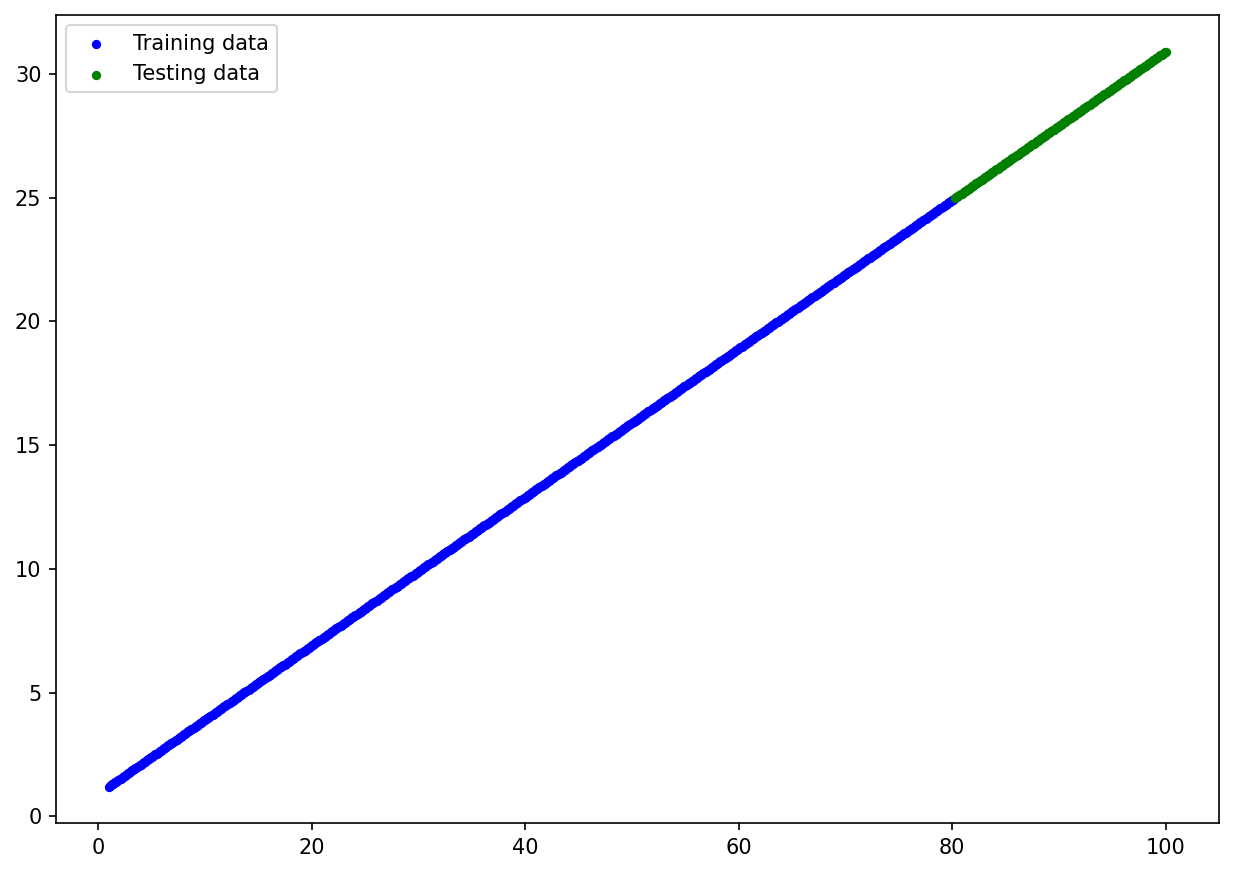

In [22]:
plot_predictions(X_train, y_train, X_test, y_test)

In [23]:
class LinearRegression(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [24]:
model = LinearRegression()

In [25]:
model.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [26]:
loss_fn = nn.L1Loss()
optimizer = optim.Adam(model.parameters())


In [27]:
epochs = 1000

train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model.train()

    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    train_loss_values.append(loss.item())

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
        test_loss_values.append(test_loss)

        if epoch % 10 == 0:
            print(
                f"Epoch: {epoch} | MAE Train loss: {train_loss} | MAE Test loss: {test_loss}"
            )

Epoch: 0 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 6.486066818237305
Epoch: 10 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 5.5746684074401855
Epoch: 20 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 4.663278102874756
Epoch: 30 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 3.7518930435180664
Epoch: 40 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 2.840507745742798
Epoch: 50 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 1.9291250705718994
Epoch: 60 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 1.0177398920059204
Epoch: 70 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 0.10635487735271454
Epoch: 80 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 0.6241233944892883
Epoch: 90 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 0.6859860420227051
Epoch: 100 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 0.4300551116466522
Epoch: 110 | MAE Train loss: 0.00611211359500885 | MAE Test loss: 0.2589836418

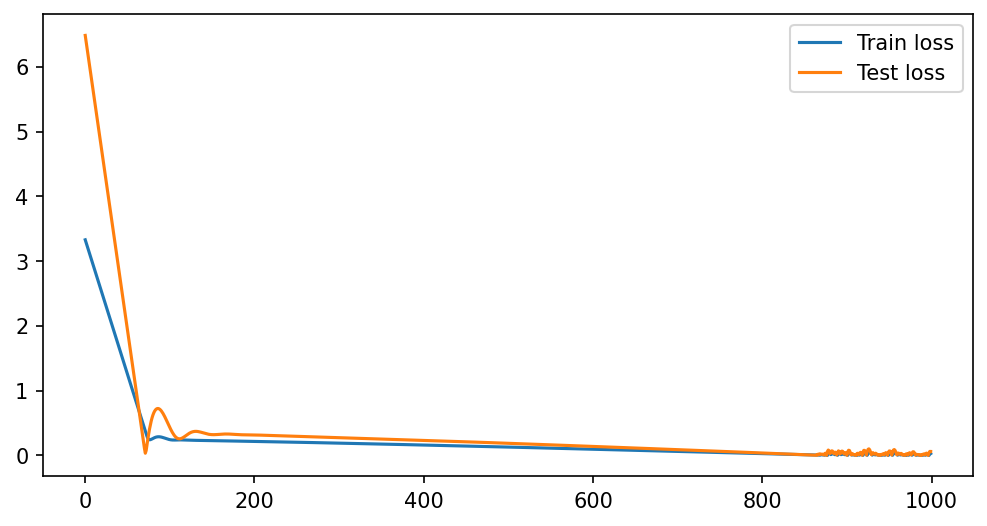

In [33]:
plt.figure(figsize=(8, 4), dpi=150)
plt.plot(range(epochs), train_loss_values, label="Train loss")
plt.plot(range(epochs), test_loss_values, label="Test loss")
plt.legend()

In [28]:
weight, bias

(0.3, 0.9)

In [29]:
model.state_dict()

OrderedDict([('weights', tensor([0.2993])), ('bias', tensor([0.8994]))])

In [30]:
model.eval()
with torch.inference_mode():
    y_pred = model(X_test)


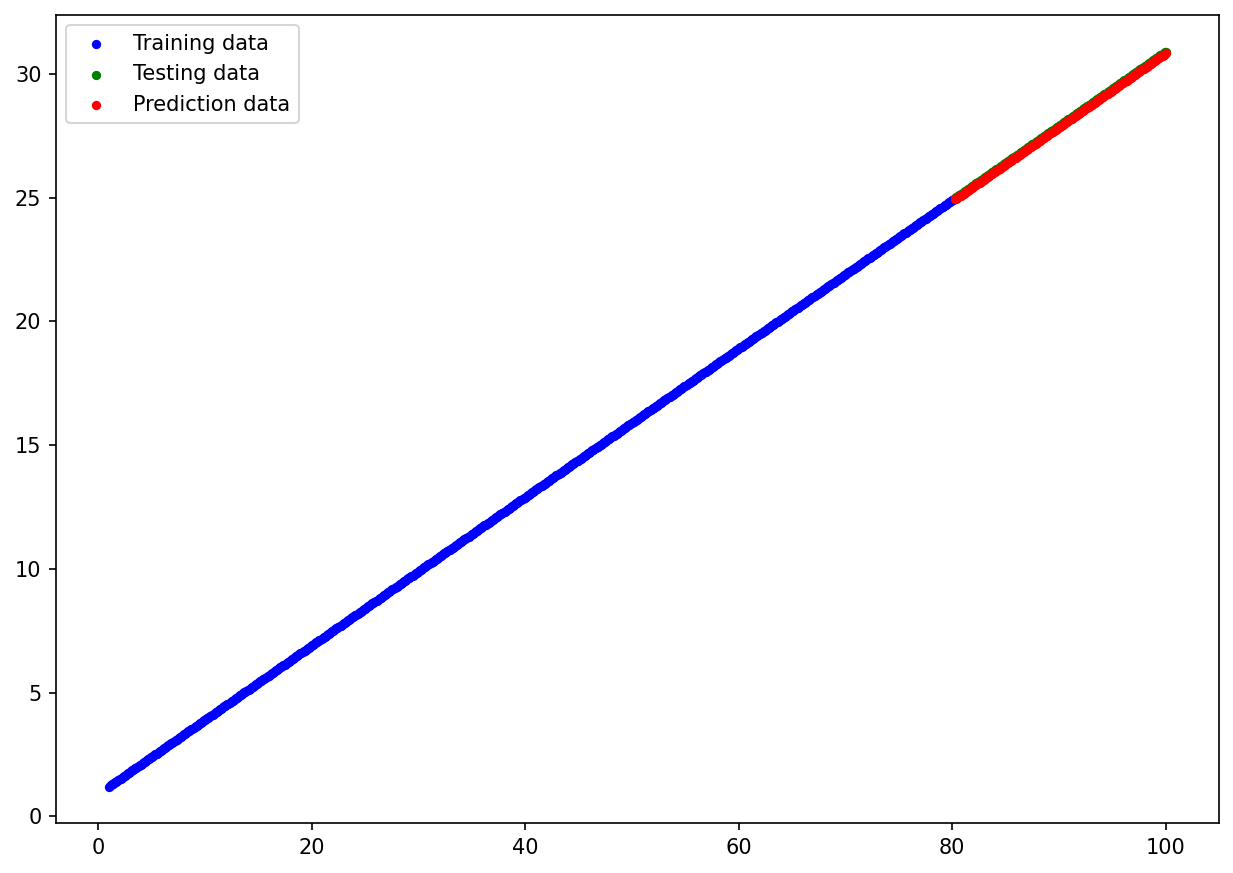

In [31]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)